### Import library

In [3]:
# !pip install stitching

In [4]:
import sys
sys.path.append("..")
from tools.display import display_images
from tools.multi_plot import plot
import os
import cv2

In [5]:
from stitching import Stitcher
stitcher = Stitcher()

### configuration

In [25]:
files = os.listdir("Z3")
files = [os.path.join("Z3", file) for file in files]

In [82]:
images = []
for file_name in files:
    image = cv2.imread(file_name)
    images.append(image)

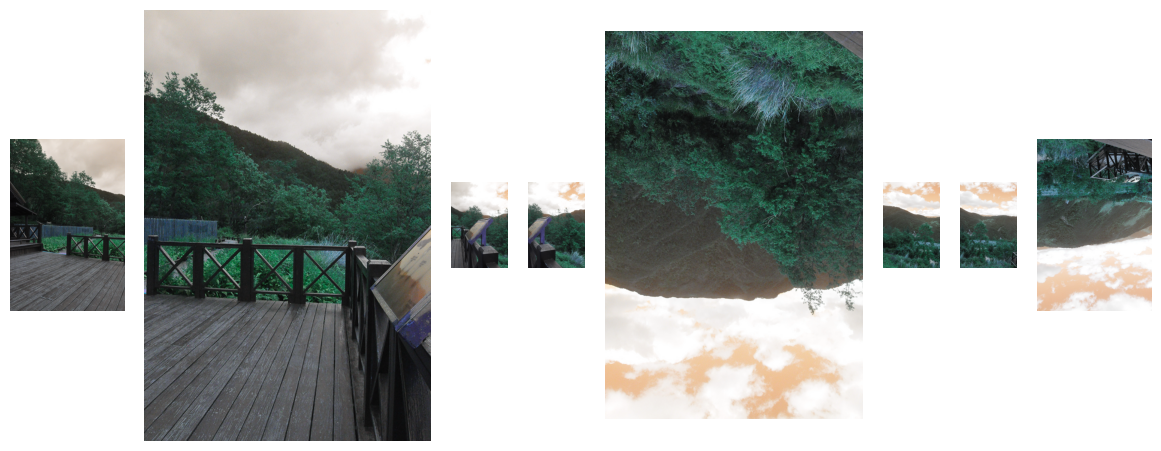

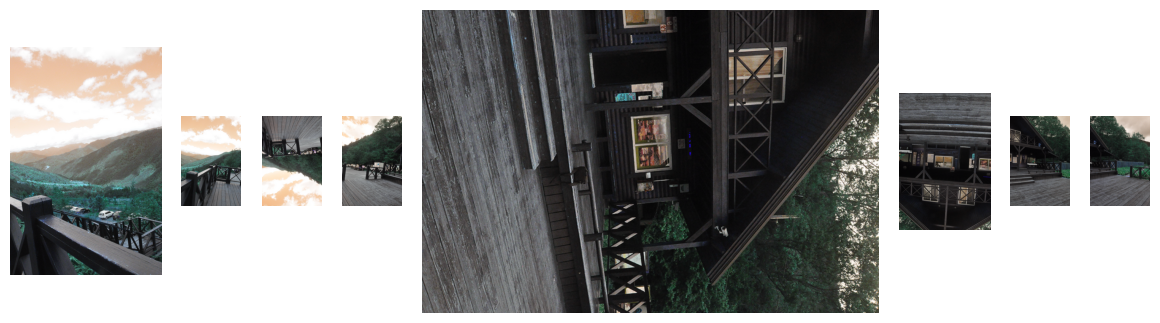

In [31]:
plot(images[:8])
plot(images[8:])

In [83]:
def verticalize(image):
    if image.shape[0] < image.shape[1]:
        return cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    return image

def rotate_180(image):
    return cv2.rotate(image, cv2.ROTATE_180)

def resize_by_height(image, height):
    ratio = height / image.shape[0]
    return cv2.resize(image, (0, 0), fx=ratio, fy=ratio)

images = [verticalize(image) for image in images]
images = [resize_by_height(image, 1000) for image in images]

for i in [4,7,10,12,13]:
    images[i] = rotate_180(images[i])

for i in [7,8,10,12]:
    images[i] = cv2.flip(images[i], 1)


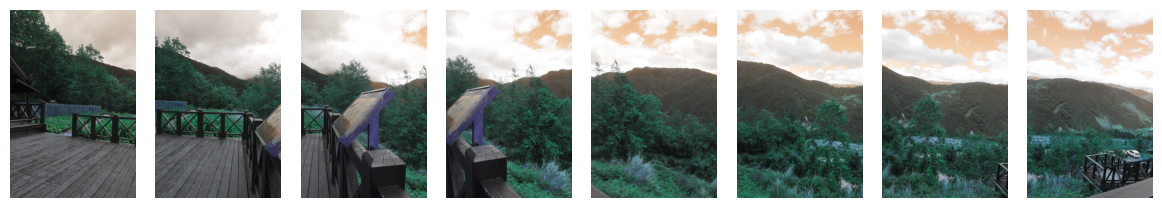

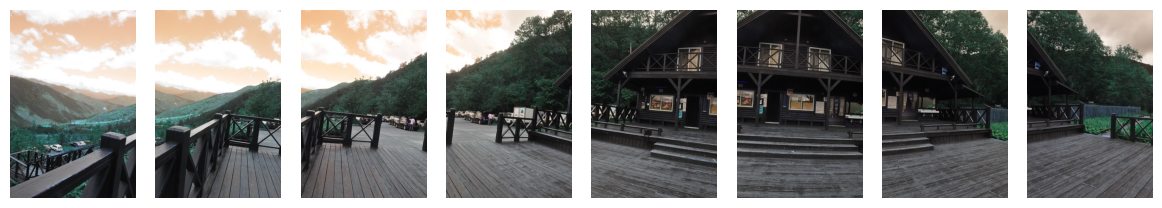

In [84]:
plot(images[:8])
plot(images[8:])

In [85]:
for i, img in enumerate(images):
    cv2.imwrite(f'Z3_resized/{i}.jpg', img)

In [86]:
folder = r'Z3_resized/'
dir_list = os.listdir(folder)
dir_list = [os.path.join('Z3_resized', file) for file in dir_list]
dir_list.sort(key=lambda x: int(x.split('\\')[-1].split('.')[0]))

imgs = []
# list1 = list1[3:]
imgs = [cv2.imread(img) for img in dir_list]

In [89]:
stitcher = Stitcher(detector="sift", confidence_threshold=0.1)

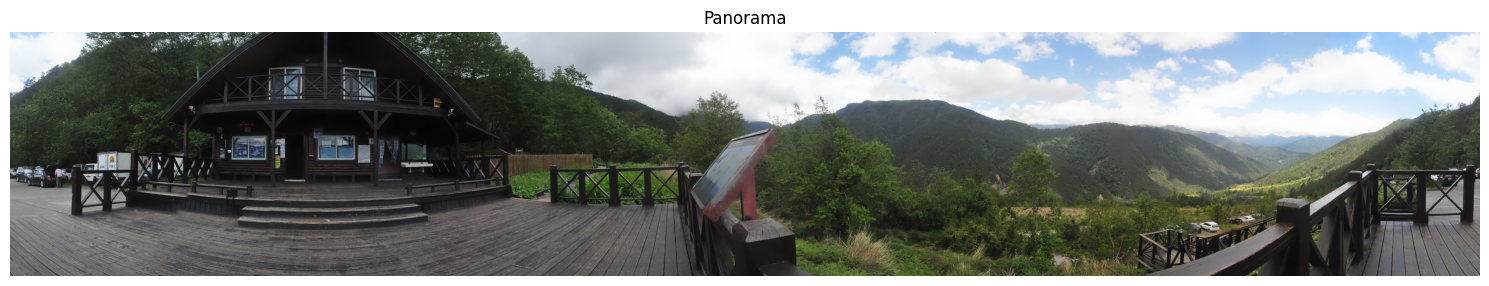

In [90]:
panorama = stitcher.stitch(dir_list)
display_images([panorama], ["Panorama"])